## Advanced DS for Innovation

### Neural Networks & Heroku

The steps are:

    Setup Repository
    Load and Explore Dataset
    Prepare Data
    Baseline Model
    Define Architecture
    Create Data Loader
    Train Model
    Assess Performance
    Push Changes


## 1. Setup Repository

**[1.1]** Go to a folder of your choice on your computer (where you store projects)

**[1.2]** Copy the cookiecutter data science template - answer `yes` to replace
- Follow the prompt (name the project and repo adv_dsi_lab_6)

**[1.3]** Go inside the created folder `adsi_at2`

In [ ]:
# Go to a folder of your choice on your computer (where you store projects)
cd ~/Projects/

# Copy the cookiecutter data science template - anser 'yes' to replace
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science
    
# answer: yes
# project name: adsi_at2

# Go inside the created folder adsi_at2
cd adsi_at2

**[1.4]** Create a file called `Dockerfile` and add the following content:

`FROM jupyter/scipy-notebook:0ce64578df46`

`RUN pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchtext==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html`

`ENV PYTHONPATH "${PYTHONPATH}:/home/jovyan/work"`

`RUN echo "export PYTHONPATH=/home/jovyan/work" >> ~/.bashrc`

`WORKDIR /home/jovyan/work`


**[1.5]** Build the image from this Dockerfile

- Documentation: https://docs.docker.com/engine/reference/commandline/build/

**[1.6]** Run the built image

**[1.7]** Display last 50 lines of logs<br>
- Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

In [ ]:
# Build the image from this Dockerfile
docker build -t pytorch-notebook:latest .
    
# Run the built image
docker run  -dit --rm --name adsi_at2 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/adv_dsi/adsi_at2:/home/jovyan/work  -v ~/Projects/adv_dsi/src:/home/jovyan/work/src -v ~/Projects/adv_dsi/data:/home/jovyan/work/data pytorch-notebook:latest 
                    
# Display last 50 lines of logs
docker logs --tail 50 adsi_at2

**[1.8]** Initialise the repo

**[1.9]** Login into Github with your account (https://github.com/) and create a public repo with the name `adsi_at2`

**[1.10]** In your local repo `adsi_at2`, link it with Github (replace the url with your username)

**[1.11]** Add you changes to git staging area and commit them

**[1.12]** Push your master branch to origin

**[1.13]** Preventing push to `master` branch

**[1.14]** Create a new git branch called `pytorch_multi`



In [ ]:
"""
# Initialise the repo
git init

# Login into Github with your account (https://github.com/) and create a public repo with the name `adsi_at2`

# Link repo with Github
git remote add origin git@github.com:CazMayhem/adsi_at2.git

# Add you changes to git staging area and commit them
git add .
git commit -m "init"

# Push your master branch to origin
git push https://<insert_pat>@github.com/CazMayhem/adsi_at2.git --set-upstream origin master

# Preventing push to master branch
git config branch.master.pushRemote no_push

# Create a new git branch called pytorch_mnist
git checkout -b pytorch_multi_class
"""

### 2.   Load and Explore Dataset

**[2.1]** Launch the magic commands for auto-relaoding external modules

In [1]:
# Launch the magic commands for auto-relaoding external modules
%load_ext autoreload
%autoreload 2

**[2.2]** Import the pandas and numpy packages

**[2.3]** Create a variable called `file_url` containing th url to the raw dataset

**[2.4]** Load the data in a dataframe called `df`

**[2.5]** Display the first 5 rows of df

In [2]:
# import the pandas and numpy packages
import pandas as pd
import numpy as np
import time

# only download once - link does not work here, download locally then move to ../data/raw
# !wget -P ../data/raw https://drive.google.com/file/d/1vYyJL_IB6KjKCxuk9kg4vIMPGTtoX8Ek/view?usp=sharing

# Load the data in a dataframe called df
df = pd.read_csv('../data/raw/beer_reviews.csv')   

# Display the first 5 rows of df
df.head() 

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


**[2.6]** Display the dimensions (shape) of df

In [3]:
# Display the dimensions (shape) of df
df.shape

(1586614, 13)

**[2.7]** Display the summary (info) of df

In [4]:
# Display the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


**[2.8]** Display the descriptive statistics of df

In [45]:
# Display the descriptive statictics of df
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


**[2.8]** Investigate feature range of values, and their min/max values

In [28]:
# keep this list of features & target beer_style
# 'brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_style'

# 5742 unique brewery name
print('Unique brewery names     :',df['brewery_name'].value_counts().count())

# review_aroma
print('Unique review_aroma      :',df['review_aroma'].value_counts().count())

# review_appearance
print('Unique review_appearance :',df['review_appearance'].value_counts().count())

# review_palate
print('Unique review_palate     :',df['review_palate'].value_counts().count())

# review_taste
print('Unique review_taste      :',df['review_taste'].value_counts().count())

# beer_abv
print('Unique beer_abv          :',df['beer_abv'].value_counts().count())

# Target beer_style
print('Target beer_style        :',df['beer_style'].value_counts().count())

Unique brewery names     : 5742
Unique review_aroma      : 9
Unique review_appearance : 10
Unique review_palate     : 9
Unique review_taste      : 9
Unique beer_abv          : 530
Target beer_style        : 104


In [29]:
# Target counts
df['beer_style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

In [30]:
# Name of brewery - 5742 unique names
df['brewery_name'].value_counts()

Boston Beer Company (Samuel Adams)        39444
Dogfish Head Brewery                      33839
Stone Brewing Co.                         33066
Sierra Nevada Brewing Co.                 28751
Bell's Brewery, Inc.                      25191
                                          ...  
Brauhaus Simon Strasser                       1
Lennet Brau- Und Vertriebsgesellschaft        1
Sudds Brewery Ltd.                            1
Reijin Shuzo K.k.                             1
Saffron Brewery                               1
Name: brewery_name, Length: 5742, dtype: int64

In [31]:
# Score given by reviewer regarding beer aroma
df['review_aroma'].value_counts()

4.0    557383
3.5    365312
4.5    271450
3.0    200030
2.5     66359
5.0     64117
2.0     42566
1.5     12524
1.0      6873
Name: review_aroma, dtype: int64

In [32]:
# Score given by reviewer regarding beer palate
df['review_appearance'].value_counts()

4.0    674186
3.5    318529
4.5    288108
3.0    166009
5.0     65398
2.5     39493
2.0     25414
1.5      6147
1.0      3323
0.0         7
Name: review_appearance, dtype: int64

In [38]:
# Score given by reviewer regarding beer palate
df['review_palate'].value_counts()

4.0    606711
3.5    338585
4.5    253102
3.0    206932
2.5     62842
5.0     62190
2.0     38333
1.5     11045
1.0      6874
Name: review_palate, dtype: int64

In [37]:
# Score given by reviewer regarding beer taste
df['review_taste'].value_counts()

4.0    541429
4.5    336162
3.5    324541
3.0    166860
5.0     83977
2.5     66534
2.0     41992
1.5     15128
1.0      9991
Name: review_taste, dtype: int64

In [35]:
# Alcohol by volume measure 
df['beer_abv'].value_counts()

5.00     109144
8.00      67744
6.00      65383
7.00      59460
9.00      59183
          ...  
6.78          1
7.74          1
3.99          1
1.30          1
10.17         1
Name: beer_abv, Length: 530, dtype: int64

In [53]:
# Target counts
df['beer_style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

**[2.10]** What are the top 10 beer_styles number of reviews

In [6]:
df_count_bn = pd.DataFrame(df['brewery_name'].value_counts()).reset_index()
df_count_bn.columns=['brewery_name', 'num_review']
df_count_bn.iloc[:10]

df_count_bs = pd.DataFrame(df['beer_style'].value_counts()).reset_index()
df_count_bs.columns=['beer_style', 'num_review']
df_count_bs.iloc[:10]

,beer_style,num_review
0,American IPA,117586
1,American Double / Imperial IPA,85977
2,American Pale Ale (APA),63469
3,Russian Imperial Stout,54129
4,American Double / Imperial Stout,50705
5,American Porter,50477
6,American Amber / Red Ale,45751
7,Belgian Strong Dark Ale,37743
8,Fruit / Vegetable Beer,33861
9,American Strong Ale,31945


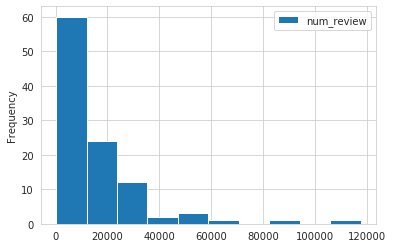

In [7]:
import seaborn as sns

sns.set_style('whitegrid')

df_count_bs.plot(kind='hist')

In [137]:
# output counts to investigate data
df_count_bs.to_csv('../data/processed/count_beer_style.csv', index=False)
df_count_bn.to_csv('../data/processed/count_brew_name.csv', index=False)

In [3]:
# create lists of categorical variable values
list_beer_style = list(pd.DataFrame(df['beer_style'].value_counts()).reset_index().iloc[:,0])
list_brew_name = list(pd.DataFrame(df['brewery_name'].value_counts()).reset_index().iloc[:,0])

# save to CSV so we can use in the API
pd.DataFrame(list_beer_style).to_csv('../data/processed/beer_style_list.csv', index=False)
pd.DataFrame(list_brew_name).to_csv('../data/processed/brewery_name_list.csv', index=False)

list_brew_name[:10]

['Boston Beer Company (Samuel Adams)',
 'Dogfish Head Brewery',
 'Stone Brewing Co.',
 'Sierra Nevada Brewing Co.',
 "Bell's Brewery, Inc.",
 'Rogue Ales',
 'Founders Brewing Company',
 'Victory Brewing Company',
 'Lagunitas Brewing Company',
 'Avery Brewing Company']

### 3. Prepare Data

**[3.1]** Create a copy of `df` and save it into a variable called `df_cleaned`

**[3.2]** Create a dictionary called `cats_dict` that contains the categorical variables as keys and their respective values sorted in ascending order

In [4]:
# Create a copy of df and save it into a variable called df_cleaned
df_cleaned = df.copy()

# Remove the column No as it is an identifier for rows
cols_drop = ['brewery_id','review_time','review_overall','review_profilename','beer_name','beer_beerid']
df_cleaned.drop(cols_drop, axis=1, inplace=True)
display(df_cleaned.head())

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,Vecchio Birraio,2.0,2.5,Hefeweizen,1.5,1.5,5.0
1,Vecchio Birraio,2.5,3.0,English Strong Ale,3.0,3.0,6.2
2,Vecchio Birraio,2.5,3.0,Foreign / Export Stout,3.0,3.0,6.5
3,Vecchio Birraio,3.0,3.5,German Pilsener,2.5,3.0,5.0
4,Caldera Brewing Company,4.5,4.0,American Double / Imperial IPA,4.0,4.5,7.7


In [5]:
# Remove the missing values from the target variable
rows_before = df_cleaned.shape[0]
print('Shape before null values removed:', df_cleaned.shape)

df_cleaned.dropna(inplace=True)

print('Shape after  null values removed:', df_cleaned.shape)
print(f'{rows_before-df_cleaned.shape[0]} rows with null values removed')

Shape before null values removed: (1586614, 7)
Shape after  null values removed: (1518814, 7)
67800 rows with null values removed


In [6]:
# Create a dictionary called cats_dict that contains the categorical variables as keys and their respective values sorted in ascending order
cats_dict = {
    'brewery_name': [list_brew_name],
    'beer_style': [list_beer_style],
}

**[3.3]** Import `StandardScaler` and `OrdinalEncoder` from `sklearn.preprocessing`

**[3.4]** Iterate through the elements of `cast_dict`, instantiate an OrdinalEncoder() and transform the values of each column with this encoder

**[3.5]** Create a list called `num_cols` that contains all numeric columns

In [7]:
# Import StandardScaler and OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder

# Iterate through the elements of cast_dict, instantiate an OrdinalEncoder() and transform the values of each column with this encoder
for col, cats in cats_dict.items():
    col_encoder = OrdinalEncoder(categories=cats)
    df_cleaned[col] = col_encoder.fit_transform(df_cleaned[[col]])
    
# Create a list called num_cols that contains all numeric columns - exclude the target: beer_style
num_cols = ['brewery_name','review_aroma','review_appearance','review_palate','review_taste','beer_abv']

In [45]:
# check categorical values are now numbers
df_cleaned.head()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,4070.0,2.0,2.5,15.0,1.5,1.5,5.0
1,4070.0,2.5,3.0,73.0,3.0,3.0,6.2
2,4070.0,2.5,3.0,69.0,3.0,3.0,6.5
3,4070.0,3.0,3.5,22.0,2.5,3.0,5.0
4,297.0,4.5,4.0,1.0,4.0,4.5,7.7


**[3.6]** Data distribution - which features are normally distributed v's skewed distribution. Features with skewed distributions may need transforming (if there is time).

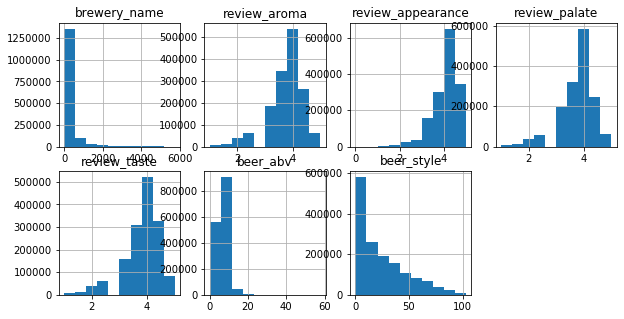

In [9]:
# keep this list of features & target beer_style
col_feat = ['brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_style']

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
    #fig.tight_layout()  # Improves appearance a bit.
    #fig.set_dpi(150)
    plt.show()

draw_histograms(df_cleaned[col_feat], df_cleaned[col_feat].columns, 2, 4)

**[3.7]** Instantiate a `StandardScaler` and called it `sc`

**[3.8]** Fit and transform the numeric feature of `df_cleaned` and replace the data into it

**[3.9]** Convert target column `beer_style` as integer

In [8]:
# Instantiate a StandardScaler and called it sc
sc = StandardScaler()

# Fit and transform the numeric feature of X_train_cleaned and replace the data into it
df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])

# Convert the column evaluation as integer
df_cleaned['beer_style'] = df_cleaned['beer_style'].astype(int)

**[3.9.1]** Check the converted data - all scaled numerics apart from target `beer_style` which is integer

**[3.9.2]** Check target `beer_style` min value is 0, and max value is one less than the total number of beer_style classes, 103 - ie: `len(list_beer_style)-1`

In [9]:
# all features are now scaled, and beer_style is an integer
df_cleaned.head()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,8.466153,-2.511041,-2.198046,15,-3.317269,-3.161958,-0.879384
1,8.466153,-1.792025,-1.384166,73,-1.109371,-1.103408,-0.362706
2,8.466153,-1.792025,-1.384166,69,-1.109371,-1.103408,-0.233537
3,8.466153,-1.073010,-0.570285,22,-1.845337,-1.103408,-0.879384
4,0.125551,1.084037,0.243595,1,0.362561,0.955143,0.283141


In [10]:
# check indicies of labels list - check starting from 0 up to len(list)-1
df_cleaned['beer_style'].value_counts().sort_index()

0      113162
1       85124
2       58081
3       53432
4       50146
        ...  
99        654
100       609
101       395
102       229
103       237
Name: beer_style, Length: 104, dtype: int64

**[3.10]** Import `split_sets_random` and `save_sets` from `src.data.sets`

**[3.11]** Split the data into training and testing sets with 80-20 ratio

**[3.12]** Create the following folder: ../data/processed/car_evaluation/

In [11]:
# Import split_sets_random from sklearn.model_selection
from src.data.sets import split_sets_random, save_sets

# Split the data into training and testing sets with 80-20 ratio
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(df_cleaned, target_col='beer_style', test_ratio=0.2)

#!mkdir ../data/processed/beer_style

**[3.13]** Save the sets in the `data/processed/beer_style` folder

In [12]:
# Save the sets in the data/processed/car_evaluation folder
save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, path='../data/processed/beer_style/')

**[3.14]** Import this class from `src/models/pytorch` and convert all sets to PytorchDataset

In [13]:
# Import this class from src/models/pytorch and convert all sets to PytorchDataset
from src.models.pytorch import PytorchDataset

train_dataset = PytorchDataset(X=X_train, y=y_train)
val_dataset = PytorchDataset(X=X_val, y=y_val)
test_dataset = PytorchDataset(X=X_test, y=y_test)

### 4. Baseline Model

**[4.1]** Import `NullModel` from `src.models.null`

**[4.2]** Instantiate a `NullModel` and call `.fit_predict()` on the training target to extract your predictions into a variable called `y_base`

**[4.3]** Import `print_class_perf` from `src.models.performance`

**[4.4]** Print the classification metrics for this baseline model



In [14]:
# Import NullModel from src.models.null
from src.models.null import NullModel

# Instantiate a NullModel and call .fit_predict() on the training target to extract 
# your predictions into a variable called y_base
baseline_model = NullModel(target_type='classification')
y_base = baseline_model.fit_predict(y_train)

# Import print_class_perf from src.models.performance
from src.models.performance import print_class_perf

# Print the classification metrics for this baseline model
print_class_perf(y_base, y_train, set_name='Training', average='weighted')

Accuracy Training: 0.07484681022903845
F1 Training: 0.010423894732065047


### 5. Define Architecture

**[5.1]** Import `torch`, `torch.nn` as `nn` and `torch.nn.functional` as `F`

**[5.2]** Instantiate `PytorchMultiClass` with the correct number of input feature and save it into a variable called `model`

**[5.3]** Import get_device() from `src.models.pytorch` and set model to use the device available

**[5.4]** Print the architecture of `model`

In [15]:
# Import torch and torch.nn as nn
import torch
import torch.nn as nn
import torch.nn.functional as F

# Instantiate PytorchMultiClass with the correct number of input feature and save it into a variable called model
from src.models.pytorch import PytorchMultiClass

model = PytorchMultiClass(X_train.shape[1])

# Set model to use the device available
from src.models.pytorch import get_device

device = get_device()
model.to(device)

PytorchMultiClass(
  (layer_1): Linear(in_features=6, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=104, bias=True)
  (softmax): Softmax(dim=1)
)

### 6. Train Model

**[6.1]** Instantiate a `nn.CrossEntropyLoss()` and save it into a variable called `criterion` 

**[6.2]** Instantiate a `torch.optim.Adam()` optimizer with the model's parameters and 0.1 as learning rate and save it into a variable called `optimizer`

In [53]:
# Instantiate a nn.CrossEntropyLoss() and save it into a variable called criterion
criterion = nn.CrossEntropyLoss()

# Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.1 as learning rate
# and save it into a variable called optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

**[6.3]** Create a function called `train_classification()` that will perform forward and back propagation and calculate loss and Accuracy scores

**[6.5]** Create a function called `test_classification()` that will perform forward and calculate loss and accuracy scores

In [54]:
# variables N_EPOCHS and BATCH_SIZE that will take respectively 50 and 32 as values
N_EPOCHS = 20
BATCH_SIZE = 32

t_start = time.process_time()

# Create a for loop that will iterate through the specified number of epochs and will train the model
# with the training set and assess the performance on the validation set and print their scores
from src.models.pytorch import train_classification, test_classification

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_dataset, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(val_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.1f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.1f}%')


# how long did that take
t_end = time.process_time()       
t_diff = (t_end - t_start)/60
print('\nTraining process took {t:.2f} minutes'.format(t=t_diff))

Epoch: 0
	(train)	|	Loss: 0.1419	|	Acc: 12.0%
	(valid)	|	Loss: 0.1418	|	Acc: 12.3%
Epoch: 1
	(train)	|	Loss: 0.1419	|	Acc: 12.2%
	(valid)	|	Loss: 0.1418	|	Acc: 12.4%
Epoch: 2
	(train)	|	Loss: 0.1419	|	Acc: 12.1%
	(valid)	|	Loss: 0.1418	|	Acc: 12.4%
Epoch: 3
	(train)	|	Loss: 0.1419	|	Acc: 12.1%
	(valid)	|	Loss: 0.1418	|	Acc: 12.4%
Epoch: 4
	(train)	|	Loss: 0.1419	|	Acc: 11.9%
	(valid)	|	Loss: 0.1418	|	Acc: 12.4%
Epoch: 5
	(train)	|	Loss: 0.1419	|	Acc: 12.1%
	(valid)	|	Loss: 0.1417	|	Acc: 12.6%
Epoch: 6
	(train)	|	Loss: 0.1418	|	Acc: 12.2%
	(valid)	|	Loss: 0.1417	|	Acc: 12.6%
Epoch: 7
	(train)	|	Loss: 0.1418	|	Acc: 12.2%
	(valid)	|	Loss: 0.1417	|	Acc: 12.6%
Epoch: 8
	(train)	|	Loss: 0.1418	|	Acc: 12.2%
	(valid)	|	Loss: 0.1417	|	Acc: 12.6%
Epoch: 9
	(train)	|	Loss: 0.1418	|	Acc: 12.2%
	(valid)	|	Loss: 0.1419	|	Acc: 11.9%
Epoch: 10
	(train)	|	Loss: 0.1419	|	Acc: 11.9%
	(valid)	|	Loss: 0.1418	|	Acc: 12.4%
Epoch: 11
	(train)	|	Loss: 0.1419	|	Acc: 12.1%
	(valid)	|	Loss: 0.1418	|	Acc: 12.4%
Ep

In [17]:
!pip install fastapi
!starlette

     |████████████████████████████████| 54 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 5.6 MB/s eta 0:00:01
/bin/sh: 1: starlette: not found


In [81]:
# load your trained model from models folder and save it into a variable called gmm_pipe
from fastapi import FastAPI
from starlette.responses import JSONResponse
from joblib import load
import pandas as pd

# libraries for PyTorch NN
from torch import load
from src.models.pytorch import PytorchMultiClass

model = torch.load('../models/pytorch_multi_beer_style.pt')

# create a function called format_features() with genre, age, income and spending as input parameters that will return a dictionary with the names of the features as keys and the inpot parameters as lists
def format_features(brewery_name, review_aroma, review_appearance, review_palate, review_taste, beer_abv):
    return {
        'brewery_name': [brewery_name],
        'review_aroma': [review_aroma],
        'review_appearance': [review_appearance],
        'review_palate': [review_palate],
        'review_taste': [review_taste],
        'beer_abv': [beer_abv]
    }

# keep this list of features & target beer_style
# 'brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_style'

# define a function called predict
# @app.get("/beer/predict")
def predict(brewery_name, review_aroma, review_appearance, review_palate, review_taste, beer_abv):
    features = format_features(brewery_name, review_aroma, review_appearance, review_palate, review_taste, beer_abv)
    obs = pd.DataFrame(features)
    # convert observations to Tensor
    obs_dataset = torch.Tensor(np.array(obs))
    # Make predictions
    output = model(obs_dataset)  
    return output  #np.argmax(output, axis=1)

brewery_name='Caldera Brewing Company'
review_aroma=5
review_appearance=5
review_palate=5
review_taste=4
beer_abv=5

# convert brewery name into numeric index
brew_index = list_brew_name.index(brewery_name)

features = format_features(brew_index, review_aroma, review_appearance, review_palate, review_taste, beer_abv)
obs = pd.DataFrame(features)

predict(brew_index, review_aroma, review_appearance, review_palate, review_taste, beer_abv)


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       grad_fn=<SoftmaxBackward>)

In [74]:
df_brew_name = pd.read_csv('../data/processed/brewery_name_list.csv')  
list(pd.Series(df_brew_name['0'].values)).index(brewery_name)

297

In [86]:
obs_dataset = torch.Tensor(np.array(obs))
print(obs_dataset) 

# Make predictions
with torch.no_grad():
    output = model(obs_dataset)

#output = np.argmax(output, axis=0)

print(output)

tensor([[297.,   5.,   5.,   5.,   4.,   5.]])
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


**[6.7]** Save the model into the `models` folder

**[6.8]** Assess the model performance on the testing set and print its scores

In [20]:
# Import dump from joblib package and save gmm_pipe into models folder
from joblib import dump 

dump(model,  '../models/pytorch_multi_beer_style.joblib')

# Save the model into the models folder
torch.save(model, "../models/pytorch_multi_beer_style.pt")

# Assess the model performance on the testing set and print its scores
test_loss, test_acc = test_classification(test_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)
print(f'\tLoss: {test_loss:.4f}\t|\tAccuracy: {test_acc:.1f}')

	Loss: 0.1417	|	Accuracy: 0.1


### 7.   Push changes

**[7.1]** Add your changes to git staging area

**[7.2]** Create the snapshot of your repository and add a description

**[7.3]** Push your snapshot to Github

**[7.4]** Check out to the master branch

**[7.5]** Pull the latest updates

**[7.6]** Check out to the `pytorch_multi_class` branch

**[7.7]** Merge the `master` branch and push your changes

**[7.8]** Go to Github and merge the branch after reviewing the code and fixing any conflict

In [ ]:
"""
# Add your changes to git staging area
git add .

# Create the snapshot of your repository and add a description
git commit -m "pytorch multi-class"

# Push your snapshot to Github
git push https://<insert_pat>@github.com/CazMayhem/adsi_at2.git

# Check out to the master branch
git checkout master

# Pull the latest updates
git pull https://<insert_pat>@github.com/CazMayhem/adsi_at2.git

# Merge the branch pytorch_reg
git checkout pytorch_multi_class

# Merge the master branch and push your changes, 
# any merge issues use: git merge master --allow-unrelated-histories
git merge master 
git push https://<insert_pat>@github.com/CazMayhem/adsi_at2.git

"""

**[7.1]** Stop the Docker container

In [ ]:
# Stop the Docker container
docker stop adsi_at2